In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
# matplotlib.use("Agg")
import pylab
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os
os.chdir("../../project/FLASH4.3_2/object/fat1000/")
G = 6.67e-8 #cgs
a = 28730.5 #cm/s

i =0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
margin = dim/3
start  = margin
end = dim-margin
cell_size = int((ds.domain_width/dim)[0].in_cgs())
print "cell size: ", cell_size
print end-start
print "looping through: ", (end-start)**3
boxlen = 1e19
ctr = dim/2
dr=cell_size
timestep=1

cell size:  39062500000000000
86
looping through:  636056


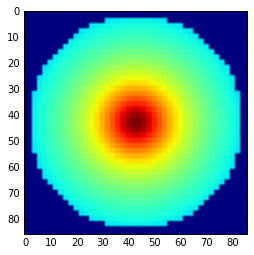

In [3]:
plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())

In [4]:
xi_range = np.logspace(-2,np.log10(17),num=20)
r_range = xi_range/1.057E-17
def plot_MR(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    xyzrange = np.arange(start,end)
    sum_args_list = []
    for ri in r_range:
        print "Looking at radius: ", ri
        sum_args = 0
        for i in xyzrange:
            for j in xyzrange:
                for k in xyzrange:
                    r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
                    if np.isclose(r,ri,atol=dr):#atol is +/-
    #                     if r<ri:
                        #print "inside:" , r
                        sum_args+=r*dens_arr[i][j][k]*dr
        print sum_args
        sum_args_list.append(sum_args)
    sum_args_list = np.array(sum_args_list)

    print sum_args_list
    plt.loglog(xi_range,4*np.pi*G*sum_args_list/a)
    # plt.savefig('mass.png')

In [5]:
tlst =[1]
tlst.extend(np.arange(5,31,5))

In [ ]:
plot_MR(30)

Looking at radius:  9.46073793756e+14
9.28846929747e+17
Looking at radius:  1.39942181651e+15
9.28846929747e+17
Looking at radius:  2.07000916151e+15
9.28846929747e+17
Looking at radius:  3.06193449192e+15
9.28846929747e+17
Looking at radius:  4.52917939066e+15
9.28846929747e+17

In [ ]:
for t in tlst:
    plot_MR(t)

For the fat1000/, I ran this not in the notebook but in terminal script and save my results into these textfiles

In [19]:
G = 6.67e-8 #cgs
a = 28730.5 #cm/s
xi_range = np.logspace(-2,np.log10(17),num=20)

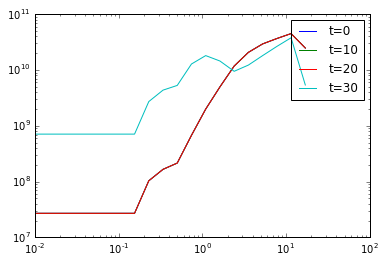

In [25]:
for s in [0,10,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

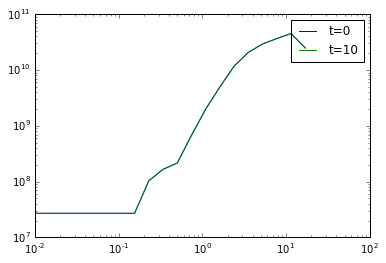

In [24]:
for s in [0,10]:#,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

so t = 0, 10, 20 all look the same and lie on top of each other. Only changes start happening after t=20. 